<a href="https://colab.research.google.com/github/dlguswn3659/big_pie/blob/master/assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment07** #

Name : 이현주

Student # : 20184060

# **1. Plot the training data [1pt]**

- plot the training data points (x,y) with their labels / in colors (blue for label 0 and red for label 1)

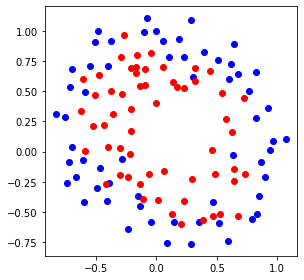

In [114]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.animation as animation
from scipy import stats 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_regression 
import csv
import math
# from google.colab import files

# uploaded = files.upload()

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# **2. Plot the training error with varying regularization parameters[9pt]**

- choose a value for λ1 in such a way that over-fitting is demonstrated and plot the training error J(θ) at every iteration of gradient descent until convergence (in red color) [3pt]
- choose a value for λ2 in such a way that just-right is demonstrated and plot the training error J(θ) at every iteration of gradient descent until convergence (in green color) [3pt]
- choose a value for λ3​ in such a way that under-fitting is demonstrated and plot the training error J(θ) at every iteration of gradient descent until convergence (in blue color) [3pt]
- the above three curves should be presented all together in a single figure

In [0]:
X = pointX #전체 x
y = np.array(pointY,dtype=float)
label = np.array(label,dtype=float)
# print(len(y))

In [0]:
def g_function(X, y, theta, it, i):
  result = 0
  for m in range(0, 10): 
    for n in range(0, 10):
      result = result + theta[m*10 + n][it]*(X[i]**m)*(y[i]**n)

  return result
  # return  (theta[0][it] + theta[1][it]*X[i] + theta[2][it]*y[i] + theta[3][it]*X[i]*X[i] +
  #         theta[4][it]*X[i]*y[i] + theta[5][it]*y[i]*y[i] + theta[6][it]*X[i]*X[i]*X[i] + theta[7][it]*X[i]*X[i]*y[i] +
  #         theta[8][it]*X[i]*y[i]*y[i] + theta[9][it]*y[i]*y[i]*y[i] + theta[10][it]*X[i]*X[i]*X[i]*X[i] + theta[11][it]*X[i]*X[i]*X[i]*y[i] +
  #         theta[12][it]*X[i]*X[i]*y[i]*y[i] + theta[13][it]*X[i]*y[i]*y[i]*y[i] + theta[14][it]*y[i]*y[i]*y[i]*y[i] 
  #         #  + theta[15][it]*X[i]*X[i]*X[i]*X[i]*X[i]
  #          )

In [0]:
def gradient_descent(X,y,label,theta,learning_rate,iterations, controller):
    
    m = len(y)

    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,100))
    preds = np.zeros(100)
    differential_g_function = np.zeros(100)
    
    

    for it in range(iterations):
        print(it)
        pred = 0
        sum_theta = 0

        for i in range(0, m):
          for p in range(0, 10): 
            for n in range(0, 10):
              differential_g_function[p*10 + n] = (X[i]**p)*(y[i]**n)
          # print(i)
          #cost 함수
          pred = pred + ((-1)*label[i]*math.log(1/(1 + math.exp((-1)*g_function(X, y, theta, it, i))))-((1-label[i])*math.log(1 + (-1)*(1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))))))
          
          #  σ(z)   =    (1/(1 + math.exp((-1)*(theta[0][it] + theta[1][it]*X[i] + theta[2][it]*y[i]))))

          #theta함수
          for j in range(0, 100):
            preds[j] = preds[j] + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*differential_g_function[j]
            # (y[i]**(j%10))
        
        for i in range(0, 100):
          theta[i][it + 1] = theta[i][it] - learning_rate*((1/m)*preds[i] + controller*theta[i][it])
          # print(theta[i][it])

        for i in range(0, 100):
          theta_history[it][i] = theta[i][it]

        for p in range(0, 10): 
          for n in range(0, 10):
            sum_theta = sum_theta + (theta[p*10 + n][it]**2)
            # print(theta[p*10 + n][it]**2)

        # print(controller)
        # print(sum_theta)
        # print(pred)
        cost_history[it]  = (1/m) * pred + (controller/2)*sum_theta
        # print(cost_history[it])
        
    return theta, cost_history, theta_history

In [118]:
lr =0.5
n_iter = 100

theta = np.zeros((100, n_iter + 1))  

X_b = np.c_[np.ones((len(X),0)),X]
X_b = np.array(X_b,dtype=float)
# print(X_b.shape)
# print(X_b.dtype)
# print(y.dtype)
control_lambda = 0.5
theta,cost_history,theta_history = gradient_descent(X_b,y,label,theta,lr,n_iter, control_lambda)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [0]:
# fig,ax = plt.subplots(figsize=(12,8))

theta0_history = []
theta1_history = []
theta2_history = []
theta3_history = []
theta4_history = []
theta5_history = []
theta6_history = []
theta7_history = []
theta8_history = []
theta9_history = []
theta10_history = []
theta11_history = []
theta12_history = []
theta13_history = []
theta14_history = []
# theta15_history = []

for it in range(n_iter):
  theta0_history.append(theta_history[it][0])
  theta1_history.append(theta_history[it][1])
  theta2_history.append(theta_history[it][2])
  theta3_history.append(theta_history[it][3])
  theta4_history.append(theta_history[it][4])
  theta5_history.append(theta_history[it][5])
  theta6_history.append(theta_history[it][6])
  theta7_history.append(theta_history[it][7])
  theta8_history.append(theta_history[it][8])
  theta9_history.append(theta_history[it][9])
  theta10_history.append(theta_history[it][10])
  theta11_history.append(theta_history[it][11])
  theta12_history.append(theta_history[it][12])
  theta13_history.append(theta_history[it][13])
  theta14_history.append(theta_history[it][14])
  # theta15_history.append(theta_history[it][15])

# ax.set_ylabel('Theta')
# ax.set_xlabel('Iterations')
# _=ax.plot(range(n_iter),theta0_history,'b.', color = 'red')
# _=ax.plot(range(n_iter),theta1_history,'b.', color = 'green')
# _=ax.plot(range(n_iter),theta2_history,'b.', color = 'blue')

# for it in range(0, 15):
#   print(theta_history[-1][it])

0.6854830002145831


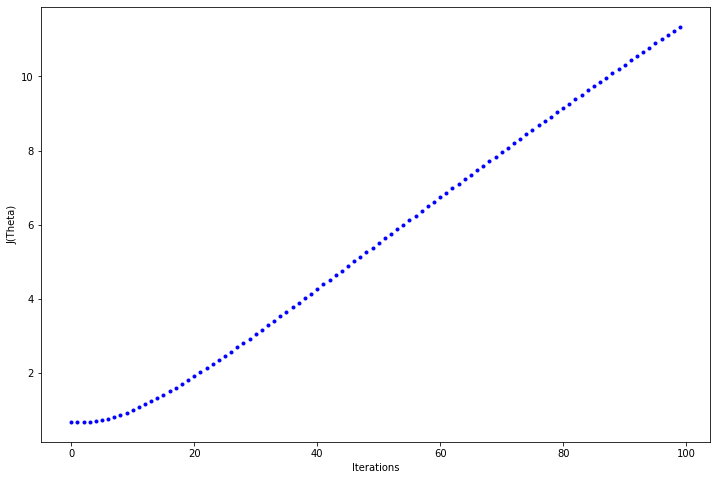

In [120]:
fig,ax = plt.subplots(figsize=(12,8))

print(cost_history[1])

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

In [121]:
%pylab inline 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [0]:
def sigmoid(z): 
  g = 1 / (1 + np.exp(-z)) 
  
  return g 
  
# print('sigmoid(10) = %s, sigmoid(-10) = %s, sigmoid(0) = %s' % (sigmoid(10), sigmoid(-10), sigmoid(0)))

In [0]:
def mapFeature(X1, X2): 
  degree =  9
  #print(X1.shape) 
  m = np.size(X1) 
  out = np.ones(m) 
  res = [] 
  
  res.append(out) 
  
  for i in np.arange(1, degree + 1): 
    for j in np.arange(0, i + 1): 
      out1 = (X1 ** (i - j)) * (X2 ** j) 
      res.append(out1) 
      
  return np.array(res).T 

data = matrix(data)

X = data[:, 0:2] 
y = data[:, 2] 

X = np.array(X)
y = np.array(y)
      
X_reg = mapFeature(X[:, 0], X[:, 1]) 
# print(X_reg[0:2, :])

In [124]:
import scipy.optimize as op 

def myCostReg(theta, X, y, s_lambda): 
  
  X = matrix(X) 

  J = 0 
  grad = np.zeros(np.size(theta)) 
  m, n = X.shape 
  y = y.reshape((m, 1)) 
  theta = theta.reshape((n, 1)) 

  theta_0 = theta[0] 
  theta_j = theta[1:] 

  theta = np.matrix(theta) 
  sum_theta_square = np.sum(theta_j ** 2) 
  predictions = X * theta 
  sig_term = sigmoid(predictions)

  J = 1/m * sum(np.multiply(-y, log(sig_term)) - np.multiply((1 - y), log(1 - sig_term))) + s_lambda / (2 * m) * sum_theta_square 
  
  return J 
  
def myGradientReg(theta, X, y, s_lambda): 
 
  X = matrix(X) 

  J = 0 
  grad = np.zeros(np.size(theta)) 
  m, n = X.shape 
  y = y.reshape((m, 1)) 
  theta = theta.reshape((n, 1)) 

  theta_0 = theta[0] 
  theta_j = theta[1:] 
 
  theta = np.matrix(theta) 

  predictions = X * theta 
  sig_term = sigmoid(predictions) 

  errors = (sig_term - y) 

  delta_0 = 1/m * errors.T * X[:, 0] 

  delta = 1/m * errors.T * X[:, 1:]

  regular = s_lambda / m * theta_j 
  delta_j = delta.T + regular 
  grad[0] = delta_0 
  grad[1:] = delta_j.T 
   
  return grad.flatten() 
   
initial_theta = np.zeros((X_reg.shape[1], 1)) 
s_lambda = 1 

Result = op.minimize(fun = myCostReg, x0 = initial_theta, args = (X_reg, y, s_lambda), method = 'TNC', jac = myGradientReg); 
cost = Result.fun 
theta = Result.x 

theta[0] = theta_history[1500][0]
theta[1] = theta_history[1500][1]
theta[2] = theta_history[1500][2]
theta[3] = theta_history[1500][3]
theta[4] = theta_history[1500][4]
theta[5] = theta_history[1500][5]
theta[6] = theta_history[1500][6]
theta[7] = theta_history[1500][7]
theta[8] = theta_history[1500][8]
theta[9] = theta_history[1500][9]
theta[10] = theta_history[1500][10]
theta[11] = theta_history[1500][11]
theta[12] = theta_history[1500][12]
theta[13] = theta_history[1500][13]
theta[14] = theta_history[1500][14]

IndexError: ignored

In [0]:
def predict(theta, X): 
  m = matrix(X) 
  m, n = X.shape 
  theta = theta.reshape((n, 1)) 
  theta = matrix(theta) 
  p = np.zeros((m, 1)) 
  p = sigmoid(X * theta) >= 0.5; 
  
  return p 

In [0]:
p = predict(theta, X_reg) 

In [0]:
def plotBoundary(theta, X, y): 
  
  if np.size(X, 1) <= 3: 
    plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1] + 2)]) 
    plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0]) 
    plot(plot_x, plot_y) 
    plt.legend(('Admitted', 'Not admitted'), loc='upper right') 
  
  else: 

    u = linspace(-1, 1.5, 800) 
    v = linspace(-1, 1.5, 800) 
    z = np.zeros((np.size(u), np.size(v))) 

    for i in np.arange(np.size(u)): 
      for j in np.arange(np.size(v)): 
        z[i, j] = np.sum(mapFeature(u[i], v[j]) * theta) 
        
        z = z.T 

    plt.figure()
    plt.scatter(pointX0, pointY0, c='b')
    plt.scatter(pointX1, pointY1, c='r')
    plt.tight_layout()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.contour(u, v, z) 

In [0]:
plotBoundary(theta, X_reg, y)

In [0]:
accuracy_history = np.zeros(1500)

for i in range(1500):
  p = predict(theta_history[i], X_reg) 
  accuracy_history[i] = np.mean(double(p == y))

In [0]:
# fig,ax = plt.subplots(figsize=(12,8))

# ax.set_ylabel('accuracy')
# ax.set_xlabel('Iterations')
# _=ax.plot(range(1500),accuracy_history,'r.')

# **3. Display the values of the chosen regularization parameters[3pt]**

- display the value of the chosen λ1 for the demonstration of over-fitting (in red color) [1pt]
- display the value of the chosen λ2​ for the demonstration of just-right (in green color) [1pt]
- display the value of the chosen λ3 for the demonstration of under-fitting (in blue color) [1pt]

# **4. Plot the training accuracy with varying regularization parameters[9pt]**

- plot the training accuracy with the chosen λ1 for over-fitting at every iteration of gradient descent until convergence (in red color) [3pt]
- plot the training accuracy with the chosen λ2​ for just-right at every iteration of gradient descent until convergence (in green color) [3pt]
- plot the training accuracy with the chosen λ3​ for under-fitting at every iteration of gradient descent until convergence (in blue color) [3pt]
- the above three curves should be presented all together in a single figure

# **5. Display the final training accuracy with varying regularization parameters[3pt]**

- display the final training accuracy obtained with the chosen λ1​ for over-fitting in number (%) at convergence (in red color) [1pt]
- display the final training accuracy obtained with the chosen λ2​ for just-right in number (%) at convergence (in green color) [1pt]
- display the final training accuracy obtained with the chosen λ3​ for under-fitting in number (%) at convergence (in blue color) [1pt]

# **6. Plot the optimal classifier with varying regularization parameters superimposed on the training data[9pt]**

- plot the boundary of the optimal classifier with the chosen λ1​ for over-fitting at convergence (in red color) [3pt]
- plot the boundary of the optimal classifier with the chosen λ2 for just-right at convergence (in green color) [3pt]
- plot the boundary of the optimal classifier with the chosen λ3​ for under-fitting at convergence (in blue color) [3pt]
- the boundary of the classifier is defined by {(x,y)∣σ(g(x,y;θ))=0.5}={(x,y)∣g(x,y;θ)=0}
- the boundaries of the classifiers with different regularization parameters should be presented with the training data points (x,y) with their labels lll in colors (blue for label 0 and red for label 1)
- you can use contour function in python3

# **Machine Learning Assignment07** #

Name : 이현주

Student # : 20184060